# Reading DataSet

In [453]:
import pandas as pd
import numpy as np

In [454]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [455]:
df = df.drop_duplicates()
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [456]:
df[" Frequency"].unique()

array([' M'], dtype=object)

In [457]:
df =df.drop(columns =[" Frequency"])

In [458]:
df = df.drop(columns =["longitude", "latitude"])

In [459]:
df = pd.DataFrame(df)

In [460]:
df.rename(columns = {
    "Region": "State",
    " Date": "Date",
    " Estimated Unemployment Rate (%)" : "unemployment_rate",
    " Estimated Employed" : "employed",
    " Estimated Labour Participation Rate (%)":"labour_participation_rate",
    "Region.1":"Region"
    },
        inplace = True
)

In [461]:
df

,State,Date,unemployment_rate,employed,labour_participation_rate,Region
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South
...,...,...,...,...,...,...
262,West Bengal,30-06-2020,7.29,30726310,40.39,East
263,West Bengal,31-07-2020,6.83,35372506,46.17,East
264,West Bengal,31-08-2020,14.87,33298644,47.48,East
265,West Bengal,30-09-2020,9.35,35707239,47.73,East


In [462]:
# making state wise data

In [463]:
states = df["State"].unique().tolist()
states

['Andhra Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Meghalaya',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [464]:
df_statewise = pd.DataFrame(
    columns = ["State","unemployment_rate","employed","labour_participation_rate","Region"]
)
df_statewise

,State,unemployment_rate,employed,labour_participation_rate,Region


In [465]:
for state in states:
    data = {"State": state,
            "unemployment_rate": df[df["State"]== state]["unemployment_rate"].mean(),
            "employed": df[df["State"]== state]["employed"].mean(),
            "labour_participation_rate": df[df["State"]== state]["labour_participation_rate"].mean(),
            "Region": " ".join(df[df["State"]== state]["Region"].unique())
        }
    df_temp = pd.DataFrame([data])
    df_statewise = pd.concat([df_statewise,df_temp], ignore_index = True)

df_statewise.head()    

,State,unemployment_rate,employed,labour_participation_rate,Region
0,Andhra Pradesh,8.664,15425480.0,38.962,South
1,Assam,4.856,10810275.5,43.498,Northeast
2,Bihar,19.471,23606828.0,37.173,East
3,Chhattisgarh,7.819,8421349.2,41.161,West
4,Delhi,18.414,4632821.9,35.857,North


In [466]:
df_statewise["labour_participation_rate"] =df_statewise["labour_participation_rate"].apply(lambda x: "{0:.2f}".format(x) )
df_statewise["employed"] =df_statewise["employed"].apply(lambda x: "{0:.0f}".format(x))
df_statewise["unemployment_rate"] =df_statewise["unemployment_rate"].apply(lambda x: "{0:.2f}".format(x) )

In [467]:
df_statewise

,State,unemployment_rate,employed,labour_participation_rate,Region
0,Andhra Pradesh,8.66,15425480,38.96,South
1,Assam,4.86,10810276,43.50,Northeast
2,Bihar,19.47,23606828,37.17,East
3,Chhattisgarh,7.82,8421349,41.16,West
4,Delhi,18.41,4632822,35.86,North
5,Goa,12.17,442375,39.24,West
6,Gujarat,6.38,22730746,45.49,West
7,Haryana,27.48,6844059,42.10,North
8,Himachal Pradesh,16.07,2033885,40.25,North
9,Jammu & Kashmir,16.48,3310032,37.89,North


In [468]:
# making region wise data 

In [469]:
regions = df_statewise["Region"].unique().tolist()
regions

['South', 'Northeast', 'East', 'West', 'North']

In [470]:
df_regionwise = pd.DataFrame(
    columns = ["Region","unemployment_rate","employed","labour_participation_rate",]
)

In [471]:
for region in regions:
    data = {"Region": region,
            "unemployment_rate": df[df["Region"]== region]["unemployment_rate"].mean(),
            "employed": df[df["Region"]== region]["employed"].mean(),
            "labour_participation_rate": df[df["Region"]== region]["labour_participation_rate"].mean(),
        }
    df_temp = pd.DataFrame([data])
    df_regionwise = pd.concat([df_regionwise,df_temp], ignore_index = True)

In [472]:
df_regionwise["unemployment_rate"] =df_regionwise["unemployment_rate"].apply(lambda x: "{0:.2f}".format(x))
df_regionwise["employed"] =df_regionwise["employed"].apply(lambda x: "{0:.0f}".format(x))
df_regionwise["labour_participation_rate"] =df_regionwise["labour_participation_rate"].apply(lambda x: "{0:.2f}".format(x))

In [473]:
df_regionwise

,Region,unemployment_rate,employed,labour_participation_rate
0,South,10.45,14040589,40.44
1,Northeast,10.95,3617106,52.06
2,East,13.92,19602367,40.11
3,West,8.24,18623513,41.26
4,North,15.89,13072488,38.70


# EDA

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt

employed work force

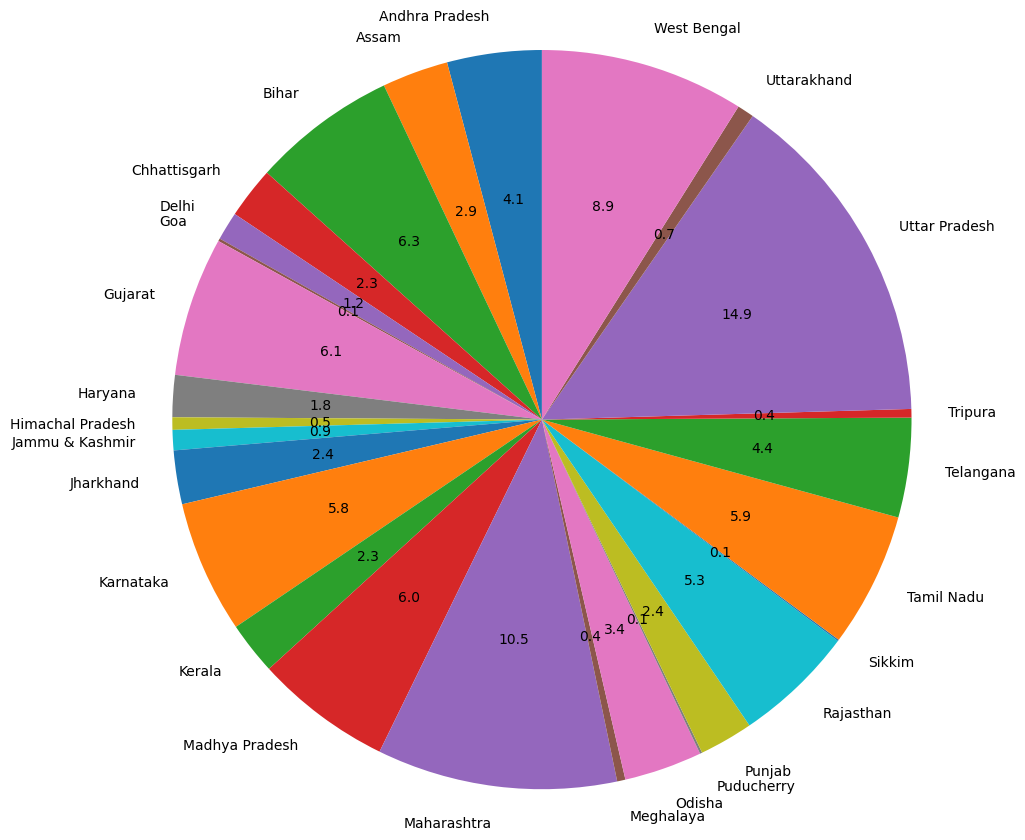

In [475]:
# plt.figure(figsize =(10,6))
plt.pie(
    df_statewise["employed"],
    labels = df_statewise["State"].unique(),
    autopct = "%0.1f",
    radius =2.5,
    startangle = 90
)

plt.show()

In [476]:
print (
    "Uttar Pradesh has the largest WorkForce of ",
    df_statewise.loc[df_statewise["employed"].astype("int64").idxmax()]["employed"]
)
print (
    "Goa has the smallest WorkForce of ",
    df_statewise.loc[df_statewise["employed"].astype("int64").idxmin()]["employed"]
)

Uttar Pradesh has the largest WorkForce of  55524799
Goa has the smallest WorkForce of  234523


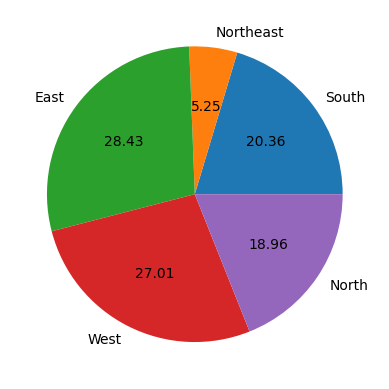

In [477]:
plt.pie(
    df_regionwise["employed"],
    labels = df_regionwise["Region"],
    autopct = "%0.2f",
)
plt.show()

In [478]:
print (
    "The Western India has the largest WorkForce of ",
    df_regionwise.loc[df_regionwise["employed"].astype("int64").idxmax()]["employed"]
)

print (
    "The Northeastern Indian has the lowest WorkForce of ",
    df_regionwise.loc[df_regionwise["employed"].astype("int64").idxmin()]["employed"]
)

The Western India has the largest WorkForce of  19602367
The Northeastern Indian has the lowest WorkForce of  3617106


unemployment rate

<Axes: xlabel='unemployment_rate', ylabel='State'>

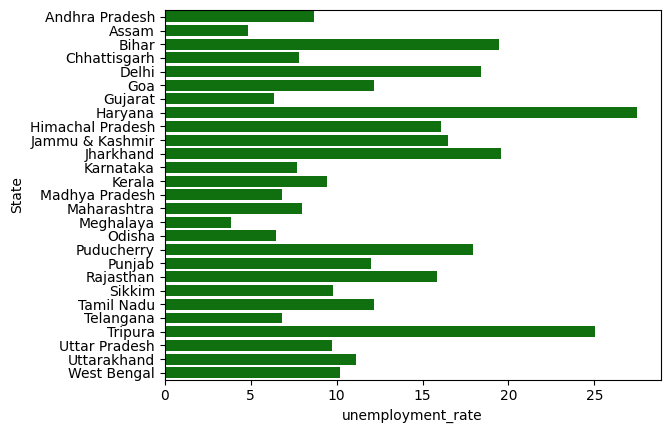

In [496]:
sns.barplot(
    data = df_statewise.astype({"unemployment_rate" : "float64"}),
    y = "State",
    x ="unemployment_rate",
    orient = "h",
    color = "green"
)

In [ ]:
print ("State with Maximum Unemployment Rate :\n",
       df_statewise.loc[df_statewise["unemployment_rate"].astype("float64").idxmax()]["State"],
       df_statewise["unemployment_rate"].astype("float64").max())
print ()
print ("Region with Maximum Unemployment Rate :\n",
       df_regionwise.loc[df_regionwise["unemployment_rate"].astype("float64").idxmin()]["Region"],
       df_regionwise["unemployment_rate"].astype("float64").max())


State with Maximum Unemployment Rate :
 Haryana 27.48

Region with Maximum Unemployment Rate :
 West 15.89


<Axes: xlabel='unemployment_rate', ylabel='Region'>

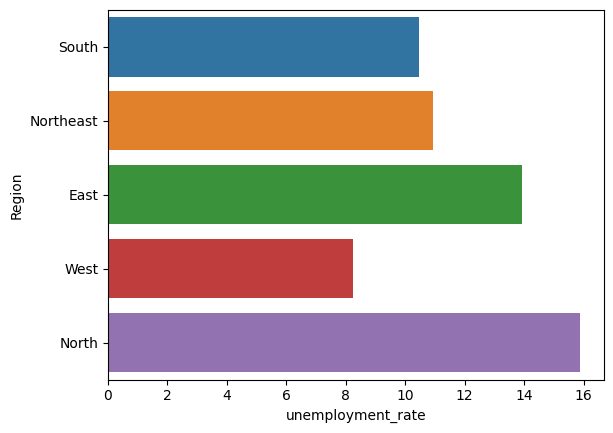

In [505]:
sns.barplot(
    data = df_regionwise.astype({"unemployment_rate" : "float64"}),
    y = "Region",
    x ="unemployment_rate",
    orient = "h",
)

In [506]:
print ("State with Maximum Unemployment Rate :\n",
       df_regionwise.loc[df_regionwise["unemployment_rate"].astype("float64").idxmax()]["Region"],
       df_regionwise["unemployment_rate"].astype("float64").max())
print ()
print ("Region with Maximum Unemployment Rate :\n",
       df_regionwise.loc[df_regionwise["unemployment_rate"].astype("float64").idxmin()]["Region"],
       df_regionwise["unemployment_rate"].astype("float64").min())

State with Maximum Unemployment Rate :
 North 15.89

Region with Maximum Unemployment Rate :
 West 8.24
